# Converting Corpus to Features

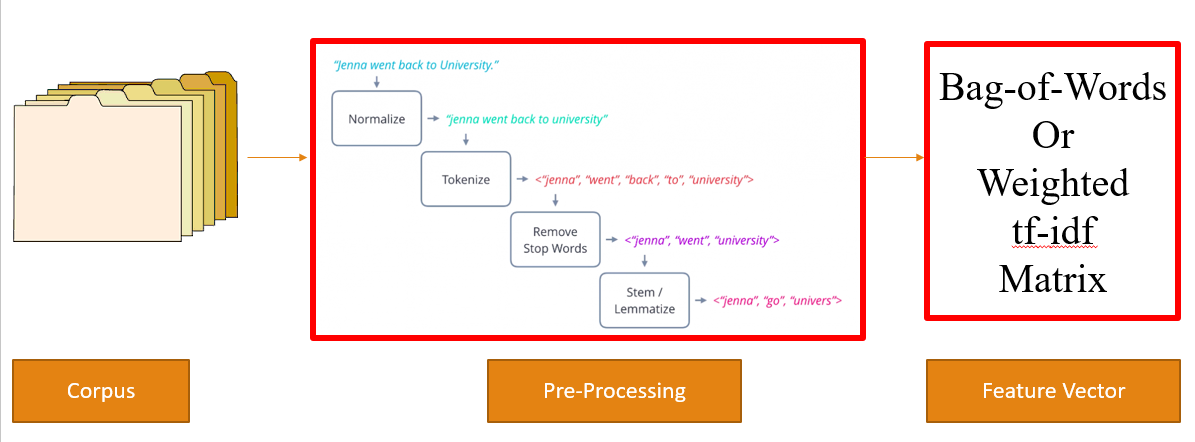

In order to convert corpus to feature matrix, following steps are used:
1. Loading your own corpus
2. Pre-processing corpus: Normalization, Tokenization, Stop-word Removal, Stemming
3. Converting pre-processed corpus to feature matrix (TDM/DTM or TTM)

# Loading your own corpus
User defined corpus can be imported in Python using two methods:
1. Using nltk.corpus PlainTextCorpusReader or CategorizedCorpusReader
2. Using file method of Python

# CorpusReader

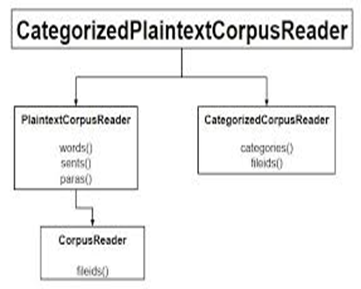



In [5]:
from nltk.corpus import PlaintextCorpusReader
path='C:/Users/jasme/Desktop/dataset/'
dataset=PlaintextCorpusReader(path,'.*')
# The same dataset can be downloaded fom following path: 'https://drive.google.com/drive/folders/1zhUOF8X-URYpmB-Zm5PyKjeFKwS7lMFv?usp=sharing/'


In [6]:
#Converting the dataset to a list (where each string represents a seperate document)
corpus=[]
for i  in dataset.fileids():
    corpus.append(dataset.raw(fileids=i))
corpus

['Data Science is an important field of science .',
 'This is an important data science course',
 'The cars are driven on the roads .',
 'The trucks are driven on the highways']

# Loading Corpus Using File Method of Python

Using files:  
File_object=open(r"File_Name","Access_Mode")

Access Modes :
1. Read Only (‘r’)
2. Read and Write (‘r+’)
3. Write Only (‘w’) 
4. Write and Read (‘w+’) 
5. Append Only (‘a’)
6. Append and Read (‘a+’)

In [9]:
import os
filenames=os.listdir(path)
corpus=[]
for i  in range(len(filenames)):
    f=open(path+filenames[i],'r')
    corpus.append(f.read())
    f.close()
corpus

['Data Science is an important field of science .',
 'This is an important data science course',
 'The cars are driven on the roads .',
 'The trucks are driven on the highways']

# Pre-processing: Step 1: Normalization

Normalization in text includes following steps:
1. Converting the text into same case (lower, upper, or proper case)
2. Removing numbers, special symbols, urls from text.


In [13]:
#Converting text to lower case using .lower() method of NLTK
lower=[]
for i in corpus:
    lower.append(' '.join([word.lower() for word in i.split()]))
lower

['data science is an important field of science .',
 'this is an important data science course',
 'the cars are driven on the roads .',
 'the trucks are driven on the highways']

In [11]:
# Removing numbers, special symbols, urls using .isalpha() method of NLTK
alpha=[]
for i in lower:
    alpha.append(' '.join([word for word in i.split() if word.isalpha()]))
alpha

['data science is an important field of science',
 'this is an important data science course',
 'the cars are driven on the roads',
 'the trucks are driven on the highways']

# Pre-processing Step 2: Tokenization

Tokenization involves converting each document as list of words. It can be done in two ways:
1. .split() method of list
2. word_tokenize method of nltk.tokenize

In [14]:
#Tokenization using .split()
tokenize=[]
for i in alpha:
    tokenize.append([word for word in i.split()])
tokenize

[['data', 'science', 'is', 'an', 'important', 'field', 'of', 'science'],
 ['this', 'is', 'an', 'important', 'data', 'science', 'course'],
 ['the', 'cars', 'are', 'driven', 'on', 'the', 'roads'],
 ['the', 'trucks', 'are', 'driven', 'on', 'the', 'highways']]

In [17]:
#Tokenization using word_tokenize
tokenize=[]
from nltk.tokenize import word_tokenize
for i in alpha:
    tokenize.append(word_tokenize(i))
tokenize

[['data', 'science', 'is', 'an', 'important', 'field', 'of', 'science'],
 ['this', 'is', 'an', 'important', 'data', 'science', 'course'],
 ['the', 'cars', 'are', 'driven', 'on', 'the', 'roads'],
 ['the', 'trucks', 'are', 'driven', 'on', 'the', 'highways']]

# Pre-processing Step 3: Stop-word Removal
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that does not have any linguistic importance in NLP applications

NLTK(Natural Language Toolkit) in python has a list of stopwords stored in stopwords corpus in 16 different languages.

The name of fields is the name of language.

In [22]:
import nltk
from nltk.corpus import *
stopword=nltk.corpus.stopwords.words('english') #stopword will contain list of all stopwords of english language
no_stop=[]
for i in tokenize:
    no_stop.append([word for word in i if word not in stopword])
no_stop

[['data', 'science', 'important', 'field', 'science'],
 ['important', 'data', 'science', 'course'],
 ['cars', 'driven', 'roads'],
 ['trucks', 'driven', 'highways']]

# Pre-processing Step 4: Stemming

Stemming is a process that maps variant word forms to their base forms (play, plays, playing, played )

nltk.stem has number of stemming algorithms named as "PorterStemmer", "LancasterStemmer", etc. These algorithms accepts the list of tokenized word and stems it into root word.


In [23]:
#Stemming Example
from nltk.stem import PorterStemmer #Importing porter stemmer class
ps=PorterStemmer() #Creating an object of PorterStemmer Class
ps.stem('departed') #stemming a word using .stem method

'depart'

In [24]:
#Stemming the corpus
final=[] #will contain final pre-processed documents
from nltk.stem import PorterStemmer
ps=PorterStemmer()
for i in no_stop:
    final.append(' '.join([ps.stem(word) for word in i]))
final

['data scienc import field scienc',
 'import data scienc cours',
 'car driven road',
 'truck driven highway']